In [3]:
# if package not installed yet
# install.packages("RMThreshold")


  There is a binary version available but the source version is later:
       binary source needs_compilation
pillar  1.6.0  1.6.3             FALSE



installing the source package 'pillar'



In [71]:
library(RMThreshold)
library(MASS)

In [86]:
f <- 3 # True slope
a <- seq(from = -2, to = 2, by=0.25)

A <- matrix(a, ncol=1, nrow=length(a))

b <- add.Gaussian.noise(f*A, mean = 0, stddev = 1, symm = FALSE)

res <- svd(A)

S <- res$d #Diagonal matrix (Sigma) in our case just a number
U <- res$u
V <- res$v

# after svd V which returned is not transponded. 
# In Python or Matlab svd returns V-transponded
# If we would like to be like Python or Matlab we have to do following:
# VT <- t(res$v)
# x = t(VT) %*% ginv(diag(S)) %*% t(U) %*% b

#variant 1
xtilde <- V %*% ginv(S) %*% t(U) %*% b # Least-square fit

#variant 2
#xtilde2 <- ginv(A) %*% b  # Least-square fit



  17 x 1 matrix read.
  This matrix contains 16 non-zero cells.

  Gaussian noise with mean 0 and standard deviation 1 added.
  The noise ranges from -0.7312 to 2.081 



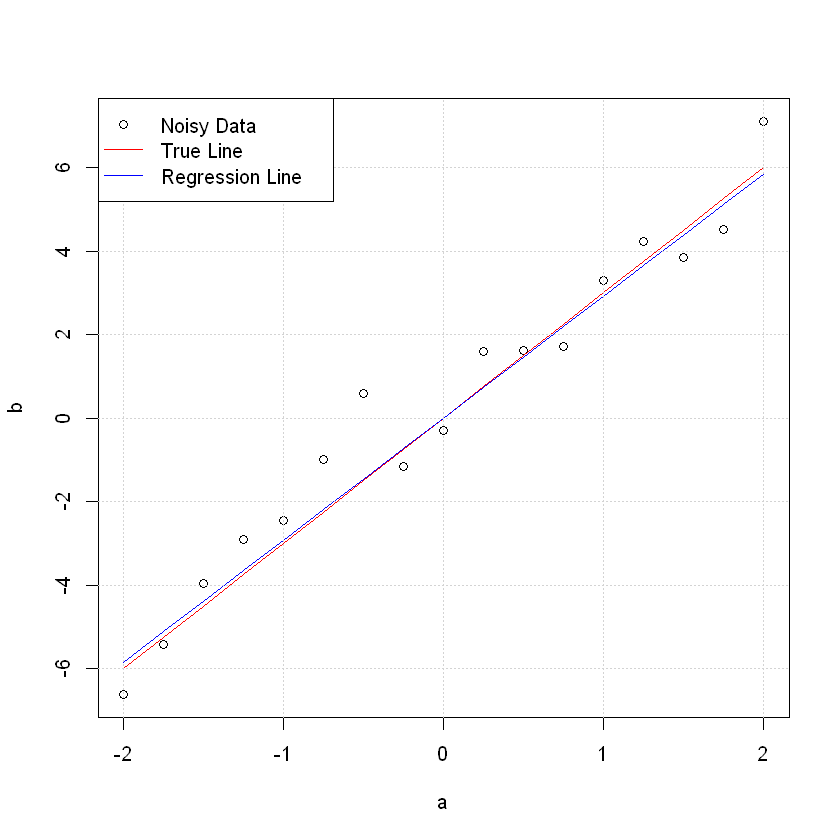

In [87]:
plot(x = a, y = b, col="black")
lines(x = a, y = t(f*A), col="red")
lines(x = a, y = t(as.numeric(xtilde)*A), col="blue")
grid()
legend("topleft", legend=c("Noisy Data", "True Line", "Regression Line"), 
       col=c("black", "red", "blue"), lwd=1, lty=c(NA,1,1), 
       pch=c(21,NA,NA))